In [2]:
# ===============================
# GÖRÜNTÜ İŞLEME DÖNEM PROJESİ
# Endüstriyel Kalite Kontrolde
# Yüzey Hatası Tespiti
# ===============================

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [4]:
folder_path = "veri"
image_files = sorted(glob.glob(os.path.join(folder_path, "*.jpg")))

print("Bulunan görsel sayısı:", len(image_files))


Bulunan görsel sayısı: 10


In [5]:
# ===============================
# 1. ÖNCEKİ ÇALIŞMA (Baseline)
# Gaussian + Sobel + Histogram
# ===============================

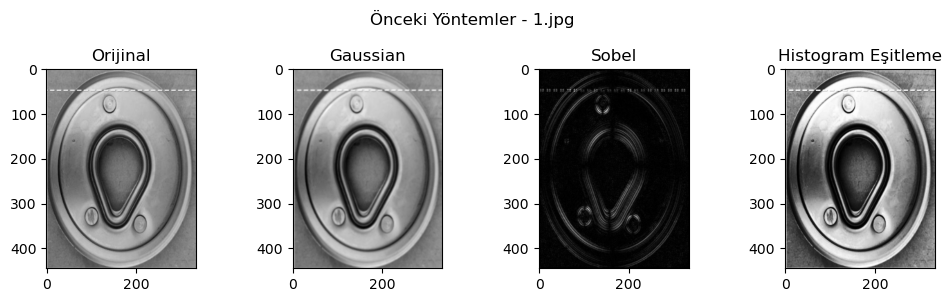

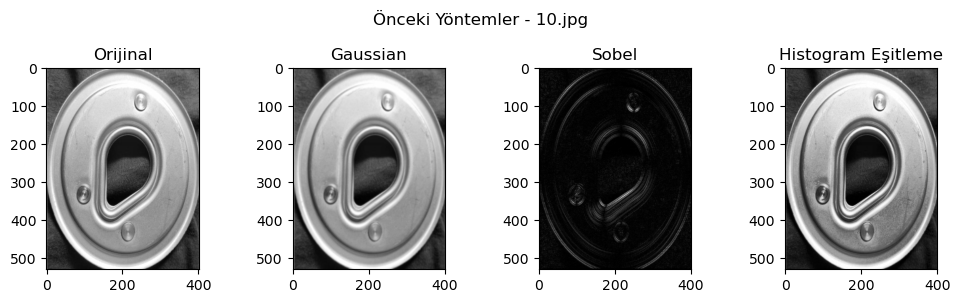

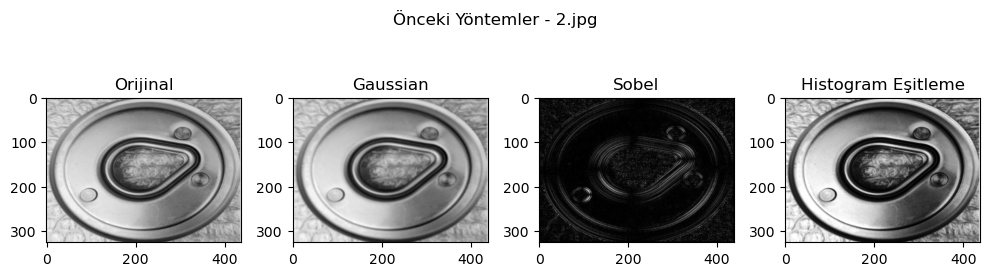

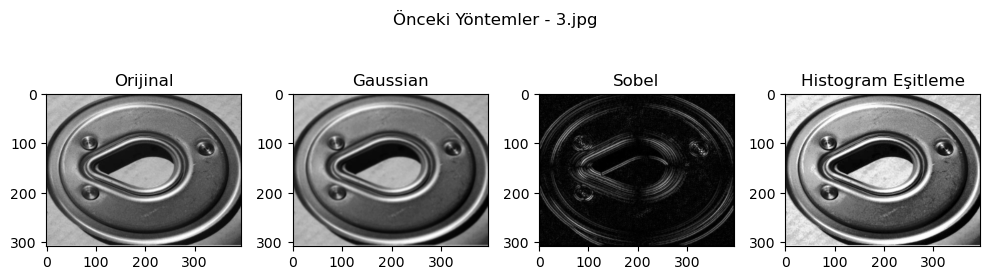

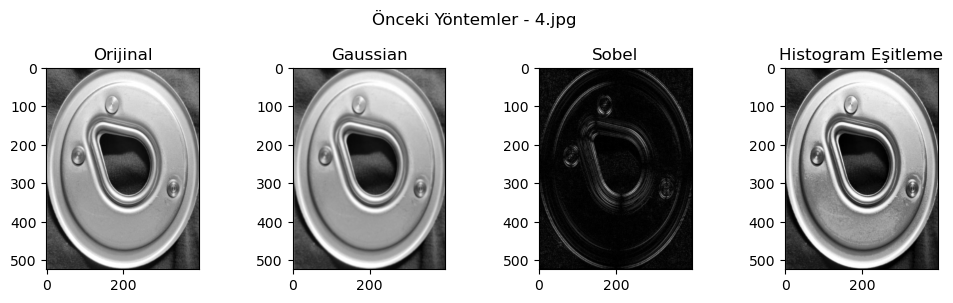

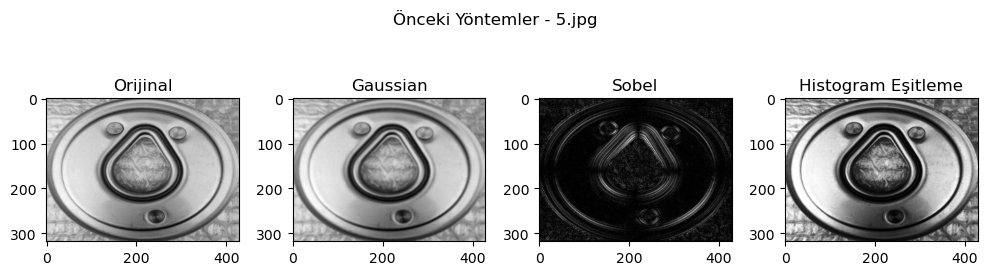

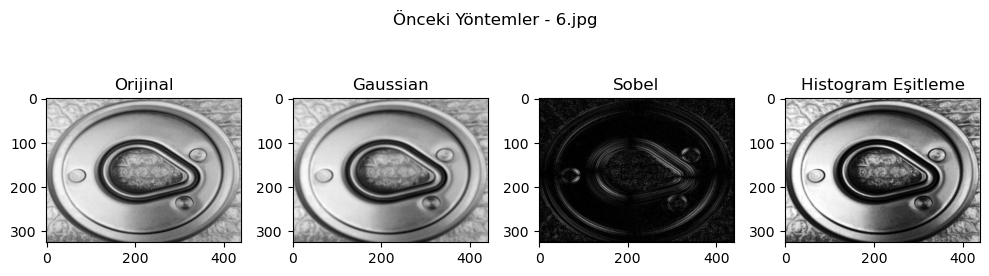

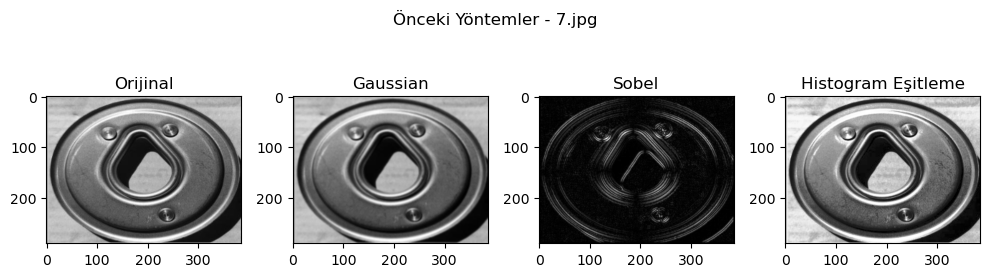

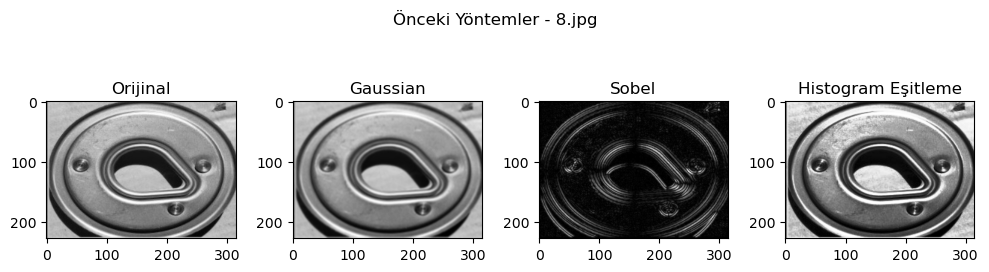

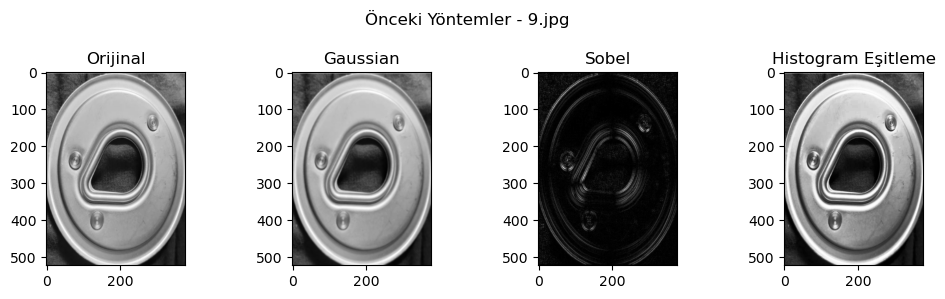

In [6]:
for img_path in image_files:
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    gaussian = cv2.GaussianBlur(gray, (5, 5), 0)

    sobel = cv2.Sobel(gaussian, cv2.CV_64F, 1, 1, ksize=3)
    sobel = cv2.convertScaleAbs(sobel)

    hist_eq = cv2.equalizeHist(gray)

    plt.figure(figsize=(10, 3))
    plt.subplot(1, 4, 1)
    plt.imshow(gray, cmap="gray")
    plt.title("Orijinal")

    plt.subplot(1, 4, 2)
    plt.imshow(gaussian, cmap="gray")
    plt.title("Gaussian")

    plt.subplot(1, 4, 3)
    plt.imshow(sobel, cmap="gray")
    plt.title("Sobel")

    plt.subplot(1, 4, 4)
    plt.imshow(hist_eq, cmap="gray")
    plt.title("Histogram Eşitleme")

    plt.suptitle(f"Önceki Yöntemler - {os.path.basename(img_path)}")
    plt.tight_layout()
    plt.show()


In [7]:
# ===============================
# 2. ÖNERİLEN YENİ YÖNTEM
# Ön işleme + Defekt Tespiti
# ===============================

In [8]:
for img_path in image_files:
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 1) CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_img = clahe.apply(gray)

    # 2) Median filtre
    median = cv2.medianBlur(clahe_img, 5)

    # 3) Adaptive Threshold
    thresh = cv2.adaptiveThreshold(
        median,
        255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV,
        11,
        2
    )

    # 4) Morfolojik işlemler
    kernel = np.ones((3, 3), np.uint8)
    morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    morph = cv2.morphologyEx(morph, cv2.MORPH_CLOSE, kernel, iterations=2)

    # 5) Contour ile yüzey hatası tespiti
    detected = img.copy()

    contours, _ = cv2.findContours(
        morph,
        cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE
    )

In [9]:
for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 200:
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(
                detected,
                (x, y),
                (x + w, y + h),
                (0, 0, 255),
                2
            )

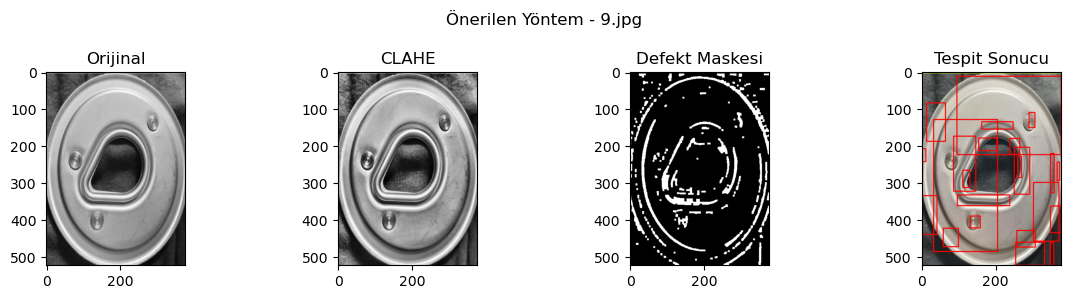

In [10]:
 # Görselleştirme
plt.figure(figsize=(12, 3))

plt.subplot(1, 4, 1)
plt.imshow(gray, cmap="gray")
plt.title("Orijinal")

plt.subplot(1, 4, 2)
plt.imshow(clahe_img, cmap="gray")
plt.title("CLAHE")

plt.subplot(1, 4, 3)
plt.imshow(morph, cmap="gray")
plt.title("Defekt Maskesi")

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(detected, cv2.COLOR_BGR2RGB))
plt.title("Tespit Sonucu")

plt.suptitle(f"Önerilen Yöntem - {os.path.basename(img_path)}")
plt.tight_layout()
plt.show()